In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import decimal
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
from collections import Counter
from pandas import pivot_table

References
- https://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html

In [172]:
df = pd.read_csv("train.csv")

In [170]:
df.head(5)

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,Friday,68113152929.000000,-1,FINANCIAL SERVICES,1000.0
1,30,7,Friday,60538815980.000000,1,SHOES,8931.0
2,30,7,Friday,7410811099.000000,1,PERSONAL CARE,4504.0
3,26,8,Friday,2238403510.000000,2,PAINT AND ACCESSORIES,3565.0
4,26,8,Friday,2006613744.000000,2,PAINT AND ACCESSORIES,1017.0


In [178]:
df.describe()

,TripType,VisitNumber,ScanCount,FinelineNumber
count,647054.000000,647054.000000,647054.000000,642925.000000
mean,58.584511,96167.640078,1.108878,3726.884567
std,157.635533,55545.485154,0.700776,2780.966158
min,3.000000,5.000000,-12.000000,0.000000
25%,27.000000,49268.000000,1.000000,1404.000000
50%,39.000000,97074.000000,1.000000,3352.000000
75%,40.000000,144316.000000,1.000000,5501.000000
max,999.000000,191347.000000,71.000000,9998.000000


In [174]:
df["Upc"] = df["Upc"].apply(lambda x: format(x, 'f'))

In [180]:
df.head(5)

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,Friday,68113152929.000000,-1,FINANCIAL SERVICES,1000.0
1,30,7,Friday,60538815980.000000,1,SHOES,8931.0
2,30,7,Friday,7410811099.000000,1,PERSONAL CARE,4504.0
3,26,8,Friday,2238403510.000000,2,PAINT AND ACCESSORIES,3565.0
4,26,8,Friday,2006613744.000000,2,PAINT AND ACCESSORIES,1017.0


In [6]:
df.count()

TripType                 647054
VisitNumber              647054
Weekday                  647054
Upc                      642925
ScanCount                647054
DepartmentDescription    645693
FinelineNumber           642925
dtype: int64

In [7]:
df.shape

(647054, 7)

In [8]:
df.columns

Index(['TripType', 'VisitNumber', 'Weekday', 'Upc', 'ScanCount',
       'DepartmentDescription', 'FinelineNumber'],
      dtype='object')

#  1. 고객(VisitNum) 별 특징 파악하기

## 1-1. 고객별 구매 갯수(scan count)
- 총 95,674명의 고객 방문
- 평균 상품 구매량은 7.5개 
- 0 이하인 경우는 아마도 반품 건? 4,395 명
- 평균 7개 구매
- 70개 이상 구매한 경우는 매우 적음 

In [12]:
VN_SC = pivot_table(df, values = ['ScanCount'], index = ['VisitNumber'], aggfunc=np.sum)
VN_SC.describe()

,ScanCount
count,95674.000000
mean,7.499467
std,10.261119
min,-52.000000
25%,2.000000
50%,4.000000
75%,9.000000
max,311.000000


C:\Program Files\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'# of Visitors')

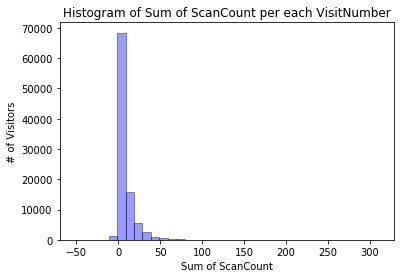

In [71]:
sns.distplot(VN_SC['ScanCount'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of Sum of ScanCount per each VisitNumber')
plt.xlabel('Sum of ScanCount')
plt.ylabel('# of Visitors')

In [33]:
VN_SC.sort_values(by = 'ScanCount', ascending = True).head()

,ScanCount
VisitNumber,
27471,-52
131193,-37
50671,-26
61053,-26
133103,-23


### 구매 갯수가 0 미만인 고객 
- 4,395명(4.6%)
- 본 데이터가 커버하는 기간 이전에 구매하고, 데이터가 커버하는 기간 중 반품한 고객? 

In [49]:
VN_SC.loc[VN_SC['ScanCount'] < 0].shape

(4395, 1)

In [61]:
len(VN_SC.loc[VN_SC['ScanCount'] < 0])/len(VN_SC)

0.04593724522858875

In [115]:
df.loc[df['VisitNumber'] ==133103]

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
445758,999,133103,Friday,4.190007e+09,-1,FROZEN FOODS,1854.0
445759,999,133103,Friday,7.209232e+09,-3,DSD GROCERY,4655.0
445760,999,133103,Friday,7.763305e+09,-1,COMM BREAD,3701.0
445761,999,133103,Friday,2.100003e+09,-1,GROCERY DRY GOODS,2452.0
445762,999,133103,Friday,7.763305e+09,-1,COMM BREAD,3701.0
445763,999,133103,Friday,7.110001e+09,-1,GROCERY DRY GOODS,2453.0
445764,999,133103,Friday,4.190007e+09,-1,FROZEN FOODS,1854.0
445765,999,133103,Friday,1.117992e+09,-5,CELEBRATION,151.0
445766,999,133103,Friday,4.450098e+09,-1,PRE PACKED DELI,7554.0
445767,999,133103,Friday,1.117992e+09,-1,CELEBRATION,151.0


### 구매 갯수가 0 인 고객은..????
- 1,803명(1.88%)
- 구매 당일 취소?(요일이 같음)
- 전부 반품한 고객? 

In [117]:
print(VN_SC.loc[VN_SC['ScanCount'] == 0].shape)
print(len(VN_SC.loc[VN_SC['ScanCount'] == 0])/len(VN_SC))

(1803, 1)
0.018845245312206032


In [87]:
df.loc[df['VisitNumber'] ==1579]

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
3979,999,1579,Friday,6.442257e+10,-1,PHARMACY OTC,509.0
3980,999,1579,Friday,8.280307e+09,1,HOME DECOR,856.0
3981,999,1579,Friday,8.280307e+09,-1,HOME DECOR,856.0
3982,999,1579,Friday,5.027695e+09,-1,HOME DECOR,856.0
3983,999,1579,Friday,6.442257e+10,1,PHARMACY OTC,509.0
3984,999,1579,Friday,5.027695e+09,1,HOME DECOR,856.0


In [99]:
df.loc[df['VisitNumber'] ==190182] # 구매 - 반품의 upc 다른 경우도있음? Upc가 nan인 경우가 있을 수 있나봄

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
642235,999,190182,Sunday,2.038210e+10,1,SERVICE DELI,7999.0
642236,999,190182,Sunday,NaN,-1,NaN,NaN


In [100]:
df.loc[df['VisitNumber'] ==189859]

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
640779,999,189859,Sunday,1.675153e+09,-1,TOYS,6135.0
640780,999,189859,Sunday,1.675153e+09,1,TOYS,6135.0


In [114]:
VN_SC.loc[VN_SC['ScanCount'] > 0][VN_SC['ScanCount'] < 50].shape

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(88547, 1)

C:\Program Files\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'# of Visitors')

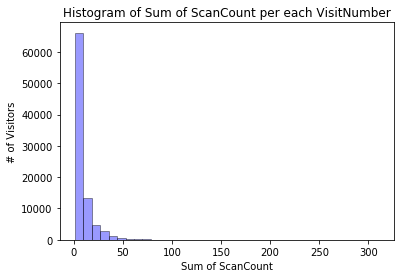

In [113]:
sns.distplot(VN_SC.loc[VN_SC['ScanCount'] > 0], hist=True, kde=False, 
             bins=int(180/5), color = 'blue', 
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of Sum of ScanCount per each VisitNumber')
plt.xlabel('Sum of ScanCount')
plt.ylabel('# of Visitors')

 ### 일부 반품은?! 
 - 그렇다면, 애초에 df에서 pivot 할 때, 0 미만인 구매내역과 0 초과인 구매내역을 구분하여 aggregate 해야 함?!

In [119]:
VN_SC_minus = pivot_table(df.loc[df['ScanCount']<0], values = ['ScanCount'], index = ['VisitNumber'], aggfunc=np.sum)
VN_SC_minus.describe()

,ScanCount
count,11077.000000
mean,-1.529475
std,1.475869
min,-52.000000
25%,-2.000000
50%,-1.000000
75%,-1.000000
max,-1.000000


In [142]:
VN_SC_minus.columns = ['ScanCount_minus']
VN_SC_minus.sort_values(by='ScanCount_minus',ascending= True).head()

,ScanCount_minus
VisitNumber,
27471,-52
131193,-37
138548,-30
50671,-26
61053,-26


In [120]:
VN_SC_plus = pivot_table(df.loc[df['ScanCount']>0], values = ['ScanCount'], index = ['VisitNumber'], aggfunc=np.sum)
VN_SC_plus.describe()

,ScanCount
count,91547.000000
mean,8.022611
std,10.329336
min,1.000000
25%,2.000000
50%,4.000000
75%,10.000000
max,313.000000


In [143]:
VN_SC_plus.columns = ['ScanCount_plus']
VN_SC_plus.sort_values(by='ScanCount_plus', ascending= False).head()

,ScanCount_plus
VisitNumber,
72439,313
88011,184
9181,137
65792,133
178154,133


In [156]:
VN_2 = pd.concat([VN_SC, VN_SC_plus, VN_SC_minus],axis=1)
VN_2 = VN_2.fillna(0)
VN_2.sort_values(by='ScanCount_plus', ascending= False).head()

,ScanCount,ScanCount_plus,ScanCount_minus
VisitNumber,,,
72439,311,313.0,-2.0
88011,183,184.0,-1.0
9181,137,137.0,0.0
65792,133,133.0,0.0
178154,133,133.0,0.0


## 구매한 부문(department) 마다 구매한 갯수(ScanCount) 
--> department 를 클러스터링 한 후, 그에 대한 구매 갯수를 VN에 붙이는 게 나을 것 같음

In [28]:
VN = pivot_table(df, values = ['ScanCount'], index = ['VisitNumber'], columns=['DepartmentDescription'], aggfunc=np.sum)

In [29]:
VN = VN.fillna(0)
VN

ScanCount                                \
DepartmentDescription 1-HR PHOTO ACCESSORIES AUTOMOTIVE BAKERY   
VisitNumber                                                      
5                            0.0         0.0        0.0    0.0   
7                            0.0         0.0        0.0    0.0   
8                            0.0         0.0        0.0    0.0   
9                            0.0         0.0        0.0    0.0   
10                           0.0         0.0        0.0    0.0   
11                           0.0         0.0        0.0    0.0   
12                           0.0         0.0        0.0    0.0   
15                           0.0         0.0        0.0    0.0   
17                           0.0         0.0        0.0    0.0   
19                           0.0         1.0        0.0    0.0   
20                           0.0         0.0        0.0    0.0   
23                           0.0         0.0        0.0    0.0   
25                           0.0         0.0        0.0    0.0   
26                           0.0         0.0        0.0    0.0   
28                           0.0         0.0        0.0    2.0   
29                           0.0         0.0        0.0    0.0   
30                           0.0         0.0        0.0    0.0   
31                           0.0         0.0        0.0    1.0   
32                           0.0         0.0        0.0    0.0   
33                           0.0         0.0        0.0    0.0   
40                           0.0         0.0        0.0    0.0   
41                           0.0         0.0        0.0    0.0   
42                           0.0         0.0        0.0    0.0   
43                           0.0         0.0        0.0    0.0   
45                           0.0         0.0        0.0    0.0   
47                           0.0         0.0        0.0    0.0   
49                           0.0         0.0        0.0    0.0   
50                           0.0         0.0        0.0    0.0   
51                           0.0         0.0        0.0    0.0   
53                           0.0         0.0        0.0    0.0   
...                          ...         ...        ...    ...   
191276                       0.0         0.0        0.0    0.0   
191277                       0.0         0.0        0.0    0.0   
191280                       0.0         0.0        0.0    0.0   
191283                       0.0         0.0        0.0    0.0   
191286                       0.0         0.0        0.0    0.0   
191287                       0.0         0.0        0.0    0.0   
191289                       0.0         0.0        0.0    0.0   
191291                       0.0         0.0        0.0    0.0   
191293                       0.0         0.0        0.0    0.0   
191298                       0.0         0.0        1.0    1.0   
191301                       0.0         0.0        0.0    0.0   
191304                       0.0         0.0        0.0    0.0   
191305                       0.0         0.0        0.0    0.0   
191311                       0.0         0.0        0.0    0.0   
191312                       0.0         0.0        0.0    0.0   
191313                       0.0         0.0        0.0    0.0   
191318                       0.0         0.0        0.0    0.0   
191322                       0.0         0.0        0.0    0.0   
191324                       0.0         0.0        3.0    1.0   
191326                       0.0         0.0        0.0    0.0   
191329                       0.0         0.0        0.0    0.0   
191331                       0.0         0.0        0.0    0.0   
191335                       0.0         0.0        0.0    0.0   
191337                       0.0         0.0        0.0    1.0   
191342                       0.0         0.0        0.0    0.0   
191343                       0.0         0.0        0.0    0.0   
191344                       0.0         0.0        0.0    0.0 

##### depart

In [23]:
# df.sort_values(by = 'VisitNumber', ascending = True)

# 방문 요일 encoding

In [24]:
df_weekday = df["Weekday"]

In [25]:
df_weekday = pd.get_dummies(df["Weekday"], prefix="W")
print(df_weekday.shape)
df_weekday.head()

(647054, 7)


,W_Friday,W_Monday,W_Saturday,W_Sunday,W_Thursday,W_Tuesday,W_Wednesday
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0


In [26]:
df = pd.concat([df, df_weekday], axis=1)

print(df.shape)
df.head()

(647054, 14)


,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber,W_Friday,W_Monday,W_Saturday,W_Sunday,W_Thursday,W_Tuesday,W_Wednesday
0,999,5,Friday,68113152929.000000,-1,FINANCIAL SERVICES,1000.0,1,0,0,0,0,0,0
1,30,7,Friday,60538815980.000000,1,SHOES,8931.0,1,0,0,0,0,0,0
2,30,7,Friday,7410811099.000000,1,PERSONAL CARE,4504.0,1,0,0,0,0,0,0
3,26,8,Friday,2238403510.000000,2,PAINT AND ACCESSORIES,3565.0,1,0,0,0,0,0,0
4,26,8,Friday,2006613744.000000,2,PAINT AND ACCESSORIES,1017.0,1,0,0,0,0,0,0


# 카테고리별 특징

In [27]:
depart = pivot_table(df, values = ['ScanCount', 'W_Monday', 'W_Tuesday', 'W_Wednesday','W_Thursday', 'W_Friday', 'W_Saturday','W_Sunday'], index = ['DepartmentDescription'], aggfunc=np.sum)
depart

,ScanCount,W_Friday,W_Monday,W_Saturday,W_Sunday,W_Thursday,W_Tuesday,W_Wednesday
DepartmentDescription,,,,,,,,
1-HR PHOTO,453,50.0,51.0,52.0,66.0,66.0,57.0,52.0
ACCESSORIES,1244,171.0,175.0,258.0,287.0,148.0,143.0,136.0
AUTOMOTIVE,5466,823.0,618.0,1092.0,1112.0,577.0,555.0,637.0
BAKERY,8304,1120.0,934.0,1280.0,1326.0,833.0,902.0,773.0
BATH AND SHOWER,4901,698.0,497.0,917.0,934.0,514.0,496.0,526.0
BEAUTY,15077,2296.0,1987.0,2802.0,2754.0,1689.0,1646.0,1691.0
BEDDING,2372,315.0,344.0,369.0,440.0,313.0,247.0,279.0
BOOKS AND MAGAZINES,981,115.0,110.0,249.0,245.0,79.0,88.0,106.0
BOYS WEAR,3675,497.0,496.0,735.0,874.0,496.0,391.0,403.0


In [128]:
table['N_Shopper']=table.iloc[:,1:8].sum(axis=1)
table.shape
table.head()

,ScanCount,W_Friday,W_Monday,W_Saturday,W_Sunday,W_Thursday,W_Tuesday,W_Wednesday,N_Shopper
DepartmentDescription,,,,,,,,,
1-HR PHOTO,453,50.0,51.0,52.0,66.0,66.0,57.0,52.0,394.0
ACCESSORIES,1244,171.0,175.0,258.0,287.0,148.0,143.0,136.0,1318.0
AUTOMOTIVE,5466,823.0,618.0,1092.0,1112.0,577.0,555.0,637.0,5414.0
BAKERY,8304,1120.0,934.0,1280.0,1326.0,833.0,902.0,773.0,7168.0
BATH AND SHOWER,4901,698.0,497.0,917.0,934.0,514.0,496.0,526.0,4582.0


In [119]:
table2 = pd.DataFrame(table)
table2[['N_per_shopper','W_Monday_p', 'W_Tuesday_p', 'W_Wednesday_p','W_Thursday_p', 'W_Friday_p', 'W_Saturday_p','W_Sunday_p']] = table[['ScanCount','W_Monday', 'W_Tuesday', 'W_Wednesday','W_Thursday', 'W_Friday', 'W_Saturday','W_Sunday']].div(table['N_Shopper'].values,axis=0)

In [120]:
table2.head()

,ScanCount,W_Friday,W_Monday,W_Saturday,W_Sunday,W_Thursday,W_Tuesday,W_Wednesday,N_Shopper,N_per_shopper,W_Monday_p,W_Tuesday_p,W_Wednesday_p,W_Thursday_p,W_Friday_p,W_Saturday_p,W_Sunday_p
DepartmentDescription,,,,,,,,,,,,,,,,,
1-HR PHOTO,453,50.0,51.0,52.0,66.0,66.0,57.0,52.0,394.0,1.149746,0.129442,0.144670,0.131980,0.167513,0.126904,0.131980,0.167513
ACCESSORIES,1244,171.0,175.0,258.0,287.0,148.0,143.0,136.0,1318.0,0.943854,0.132777,0.108498,0.103187,0.112291,0.129742,0.195751,0.217754
AUTOMOTIVE,5466,823.0,618.0,1092.0,1112.0,577.0,555.0,637.0,5414.0,1.009605,0.114149,0.102512,0.117658,0.106576,0.152013,0.201699,0.205393
BAKERY,8304,1120.0,934.0,1280.0,1326.0,833.0,902.0,773.0,7168.0,1.158482,0.130301,0.125837,0.107840,0.116211,0.156250,0.178571,0.184989
BATH AND SHOWER,4901,698.0,497.0,917.0,934.0,514.0,496.0,526.0,4582.0,1.069620,0.108468,0.108250,0.114797,0.112178,0.152335,0.200131,0.203841


In [123]:
table2.sort_values(by = 'N_per_shopper', ascending = False )

,ScanCount,W_Friday,W_Monday,W_Saturday,W_Sunday,W_Thursday,W_Tuesday,W_Wednesday,N_Shopper,N_per_shopper,W_Monday_p,W_Tuesday_p,W_Wednesday_p,W_Thursday_p,W_Friday_p,W_Saturday_p,W_Sunday_p
DepartmentDescription,,,,,,,,,,,,,,,,,
HORTICULTURE AND ACCESS,4423,484.0,289.0,600.0,623.0,253.0,317.0,327.0,2893.0,1.528863,0.099896,0.109575,0.113031,0.087452,0.167300,0.207397,0.215347
PETS AND SUPPLIES,12592,1497.0,1141.0,2136.0,1869.0,1061.0,1066.0,991.0,9761.0,1.290032,0.116894,0.109210,0.101526,0.108698,0.153365,0.218830,0.191476
GROCERY DRY GOODS,88718,10109.0,9355.0,13096.0,15417.0,6801.0,8087.0,7537.0,70402.0,1.260163,0.132880,0.114869,0.107057,0.096602,0.143590,0.186017,0.218985
INFANT CONSUMABLE HARDLINES,13149,1530.0,1508.0,1873.0,2084.0,1068.0,1324.0,1259.0,10646.0,1.235112,0.141649,0.124366,0.118260,0.100319,0.143716,0.175935,0.195754
SHEER HOSIERY,532,88.0,50.0,112.0,63.0,46.0,28.0,47.0,434.0,1.225806,0.115207,0.064516,0.108295,0.105991,0.202765,0.258065,0.145161
FROZEN FOODS,25368,2936.0,2656.0,4000.0,4796.0,2080.0,2280.0,2353.0,21101.0,1.202218,0.125871,0.108052,0.111511,0.098574,0.139140,0.189564,0.227288
"CANDY, TOBACCO, COOKIES",11745,1744.0,1123.0,1651.0,1746.0,1230.0,1202.0,1112.0,9808.0,1.197492,0.114498,0.122553,0.113377,0.125408,0.177814,0.168332,0.178018
PRE PACKED DELI,10722,1268.0,1288.0,1698.0,2101.0,838.0,980.0,879.0,9052.0,1.184490,0.142289,0.108263,0.097106,0.092576,0.140080,0.187583,0.232103
OFFICE SUPPLIES,7736,949.0,907.0,1103.0,1183.0,749.0,844.0,843.0,6578.0,1.176041,0.137884,0.128306,0.128154,0.113864,0.144269,0.167680,0.179842


In [129]:
table3 = pd.DataFrame(table)
table3[['N_per_shopper','W_Monday', 'W_Tuesday', 'W_Wednesday','W_Thursday', 'W_Friday', 'W_Saturday','W_Sunday']] = table[['ScanCount','W_Monday', 'W_Tuesday', 'W_Wednesday','W_Thursday', 'W_Friday', 'W_Saturday','W_Sunday']].div(table['N_Shopper'].values,axis=0)

In [131]:
table3.head()

,ScanCount,W_Friday,W_Monday,W_Saturday,W_Sunday,W_Thursday,W_Tuesday,W_Wednesday,N_Shopper,N_per_shopper
DepartmentDescription,,,,,,,,,,
1-HR PHOTO,453,0.126904,0.129442,0.131980,0.167513,0.167513,0.144670,0.131980,394.0,1.149746
ACCESSORIES,1244,0.129742,0.132777,0.195751,0.217754,0.112291,0.108498,0.103187,1318.0,0.943854
AUTOMOTIVE,5466,0.152013,0.114149,0.201699,0.205393,0.106576,0.102512,0.117658,5414.0,1.009605
BAKERY,8304,0.156250,0.130301,0.178571,0.184989,0.116211,0.125837,0.107840,7168.0,1.158482
BATH AND SHOWER,4901,0.152335,0.108468,0.200131,0.203841,0.112178,0.108250,0.114797,4582.0,1.069620


In [133]:
pca = PCA()
scaler = StandardScaler()

In [139]:
table3.columns

Index(['ScanCount', 'W_Friday', 'W_Monday', 'W_Saturday', 'W_Sunday',
       'W_Thursday', 'W_Tuesday', 'W_Wednesday', 'N_Shopper', 'N_per_shopper'],
      dtype='object')

In [142]:
table3_scaled = scaler.fit_transform(table3)
table3_scaled = pd.DataFrame(table3_scaled)
table3_scaled.columns = table3.columns
table3_scaled

,ScanCount,W_Friday,W_Monday,W_Saturday,W_Sunday,W_Thursday,W_Tuesday,W_Wednesday,N_Shopper,N_per_shopper
0,-0.590883,-0.775528,0.358597,-1.440174,-0.389975,2.184912,1.231997,0.252392,-0.622662,0.650151
1,-0.544526,-0.699412,0.464568,-0.071115,0.555492,0.058479,-0.044772,-0.274299,-0.559448,-0.455714
2,-0.297097,-0.102197,-0.127308,0.056581,0.322882,-0.161622,-0.256049,-0.009586,-0.279228,-0.102562
3,-0.130777,0.011413,0.385912,-0.439933,-0.061101,0.209412,0.567252,-0.189171,-0.159231,0.697073
4,-0.330209,-0.093564,-0.307795,0.022911,0.293670,0.054118,-0.053527,-0.061919,-0.336147,0.219787
5,0.266152,-0.036674,0.492934,-0.226860,-0.055859,0.109742,0.034017,-0.080940,0.367346,-0.077549
6,-0.478420,-0.517095,0.983559,-0.839745,0.046824,0.958886,-0.095326,0.050382,-0.491788,-0.002819
7,-0.559939,-1.069858,-0.230931,1.115152,1.105398,-1.198953,-0.743227,-0.207199,-0.581751,-0.213709
8,-0.402058,-0.754228,0.295028,-0.219294,0.683627,0.641850,-0.328390,-0.267730,-0.383353,-0.453618
9,-0.515400,0.668301,-0.305309,-0.171806,-0.113205,0.954492,-0.233762,-0.355950,-0.510328,-0.932379


In [145]:
pca.fit(table3_scaled)
table3_scaled_pca = pca.fit_transform(table3_scaled)

In [147]:
pd.DataFrame(pca.components_.T,
             index=table3_scaled.columns,
             columns=['PC' + str(i+1) for i in range(len(pca.components_))])

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
ScanCount,-0.177740,0.562526,0.204986,0.224156,-0.225788,0.082952,-0.017933,-0.019609,0.707913,-0.000000e+00
W_Friday,-0.260362,-0.351947,0.026210,0.566143,0.028743,0.198239,-0.490352,0.298384,0.009222,-3.427128e-01
W_Monday,-0.244897,0.205831,-0.023046,-0.708673,0.087115,0.051502,-0.534692,0.121667,0.017599,-2.892424e-01
W_Saturday,0.476072,0.136875,-0.130092,0.114607,0.122424,0.319301,-0.172568,-0.628115,-0.007992,-4.280758e-01
W_Sunday,-0.295258,0.160097,-0.603132,0.109578,0.019378,-0.425435,0.302502,-0.006794,0.002105,-4.883518e-01
W_Thursday,-0.306295,-0.318494,0.066264,-0.219065,-0.603600,0.429978,0.335142,-0.183579,-0.013138,-2.386557e-01
W_Tuesday,-0.222555,-0.184061,0.647458,-0.001168,0.172727,-0.493724,0.036887,-0.393192,0.006259,-2.603639e-01
W_Wednesday,0.460796,0.096016,0.325486,-0.077696,0.004305,0.028210,0.317004,0.559182,-0.008662,-5.023988e-01
N_Shopper,-0.177790,0.561957,0.202089,0.218723,-0.246643,0.045536,-0.062791,-0.012946,-0.704911,1.491787e-17
N_per_shopper,-0.373542,0.112400,0.075479,0.003175,0.685728,0.486523,0.365972,0.007191,-0.034791,1.308250e-15


In [148]:
pd.DataFrame(table3_scaled_pca)

,0,1,2,3,4,5,6,7,8,9
0,-1.310631,-1.420433,1.220684,-1.667236,-0.547030,0.148051,1.464443,-0.000592,-0.015324,-1.768993e-16
1,0.102592,-0.287663,-0.728290,-0.909791,-0.073350,-0.626606,0.083975,-0.243148,0.029530,-6.791163e-16
2,0.232221,-0.168682,-0.506527,-0.017319,0.118064,-0.176720,0.124767,0.049973,-0.012272,-8.424017e-16
3,-0.775267,-0.268546,0.398692,-0.417907,0.496472,0.033344,0.144087,-0.030523,0.008134,7.197065e-16
4,0.027098,-0.343549,-0.345716,0.046136,0.244995,-0.039838,0.399336,-0.092858,-0.010806,1.046477e-15
5,-0.364808,0.372822,0.176774,-0.280243,-0.251556,-0.001372,-0.267178,0.102590,-0.058331,6.745714e-16
6,-0.595593,-0.551827,-0.134666,-1.509558,-0.398724,0.057430,0.258981,0.397862,0.013804,-2.654340e-16
7,1.259567,0.491452,-1.711063,-0.166925,0.824860,-0.669519,0.263472,-0.641833,0.013509,-3.686737e-16
8,-0.119943,-0.256666,-0.861712,-0.881135,-0.580598,-0.336124,0.440125,-0.184893,-0.005351,-7.750591e-17
9,-0.021329,-1.316347,-0.367934,0.151345,-1.045774,0.106231,-0.270562,-0.001397,0.018321,-2.767663e-16


In [149]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[3.54403850e-01 2.28547668e-01 1.44705090e-01 1.23565574e-01
 7.36633730e-02 3.95406373e-02 2.11820703e-02 1.40834249e-02
 3.08312004e-04 6.99605395e-33]


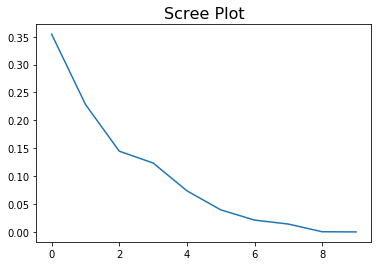

In [150]:
plt.title('Scree Plot', size=16)   
plt.plot(explained_variance)

In [151]:
cum_exp_var =np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(cum_exp_var)

[ 35.44  58.29  72.76  85.12  92.49  96.44  98.56  99.97 100.   100.  ]


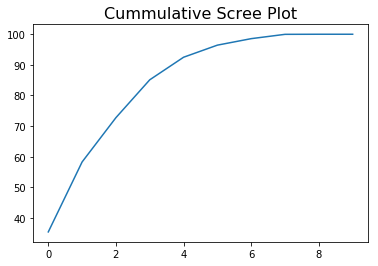

In [152]:
plt.title('Cummulative Scree Plot', size=16)   
plt.plot(cum_exp_var)

In [ ]:
pc1n2 = e_vectors[:,:2]
pc1n2

Projected_X_2D = pc1n2.T.dot(X.T)
pd.DataFrame(Projected_X_2D.T)

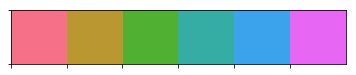

In [154]:
from sklearn.cluster import KMeans

import seaborn as sns
color_p = sns.color_palette("husl", 6)
sns.palplot(color_p)

In [ ]:
kmeans_6 = KMeans(n_clusters=6, random_state=42, n_init=20)
kmeans_6.fit(table3_scaled)
k_6 = kmeans_6.labels_
plt.figure(figsize=(8, 8))
plt.title('K-Means Clustering with K=4', size=16)
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
m = 0.5
plt.xlim(min(pc1) - m, max(pc1) + m)
plt.ylim(min(pc2) - m, max(pc2) + m)
for i in range(len(pc1)):
    plt.text(pc1[i], pc2[i], usarrests.index[i], color=color_p[k_4[i]], alpha=0.8)